In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

gr8mohit_mined_malware_path = kagglehub.dataset_download('gr8mohit/mined-malware')

print('Data source import complete.')


100%|██████████| 65.6M/65.6M [00:01<00:00, 62.5MB/s]

Extracting files...


Data source import complete.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing the Data in the environment
import pandas as pd

# Load PE headers
pe_data = pd.read_csv('/content/drive/MyDrive/mined_dataset/portable_executable.csv')

# Load DLL imports
dll_data = pd.read_csv('/content/drive/MyDrive/mined_dataset/DLLs_Imported.csv')

# Define the file path
api_func_path = '/content/drive/MyDrive/mined_dataset/API_Functions.csv'

# Step 1: Load the data in chunks and store each chunk in a list
chunk_size = 1000
chunks = pd.read_csv(api_func_path, chunksize=chunk_size)

chunk_list = []

for chunk in chunks:
    chunk_list.append(chunk)

# Step 2: Combine all chunks into a single DataFrame
api_data = pd.concat(chunk_list, ignore_index=True)

In [ ]:
# Check the shape of each dataset
print("PE Headers Shape:", pe_data.shape)
print("DLL Imports Shape:", dll_data.shape)
print("API Calls Shape:", api_data.shape)

# Check for missing values
print("PE Headers Missing Values:\n", pe_data.isnull().sum())
print("DLL Imports Missing Values:\n", dll_data.isnull().sum())
print("API Calls Missing Values:\n", api_data.isnull().sum())

# Check column names
print("PE Headers Columns:", pe_data.columns)
print("DLL Imports Columns:", dll_data.columns)
print("API Calls Columns:", api_data.columns)

# Check data types
print("PE Headers Data Types:\n", pe_data.dtypes)
print("DLL Imports Data Types:\n", dll_data.dtypes)
print("API Calls Data Types:\n", api_data.dtypes)

PE Headers Shape: (28014, 144)
DLL Imports Shape: (28016, 631)
API Calls Shape: (28017, 21920)


## EDA (Exploratory Data Analysis)

In [ ]:
# Example: Calculate entropy of PE sections
import numpy as np

def calculate_entropy(data):
    # Convert data to numeric, ignoring errors
    numeric_data = pd.to_numeric(data, errors='coerce')

    # Remove NaN values resulting from conversion
    numeric_data = numeric_data.dropna()

    hist = np.histogram(numeric_data, bins=256)[0]
    hist = hist / hist.sum()
    entropy = -np.sum(hist * np.log2(hist + 1e-10))  # Add small epsilon to avoid log(0)
    return entropy

pe_data['section_entropy'] = pe_data.apply(calculate_entropy, axis=1)

# Example: Count unique DLLs imported
dll_data['unique_dll_count'] = dll_data.astype(bool).sum(axis=1)

# Example: Count unique API calls
api_data['unique_api_count'] = api_data.astype(bool).sum(axis=1)

Malware Class Distribution:
 Type
4    4824
1    4785
3    4682
2    4408
5    4001
6    3520
0    1794
Name: count, dtype: int64


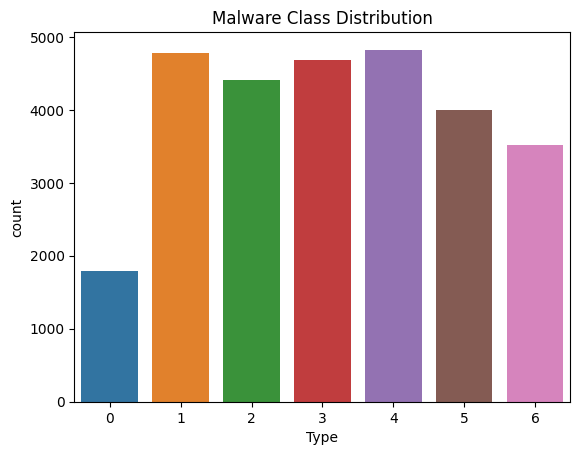

In [ ]:
# Assuming the target variable is in the PE headers dataset
target_column = 'Type'
print("Malware Class Distribution:\n", pe_data[target_column].value_counts())

# Visualize the distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=target_column, data=pe_data)
plt.title('Malware Class Distribution')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


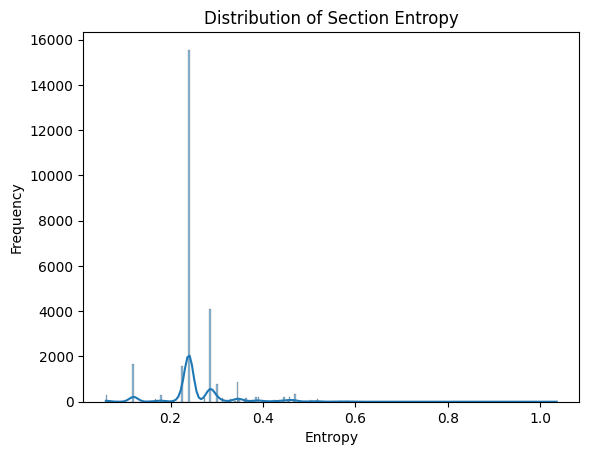

In [ ]:
sns.histplot(pe_data['section_entropy'], kde=True)
plt.title('Distribution of Section Entropy')
plt.xlabel('Entropy')
plt.ylabel('Frequency')
plt.show()

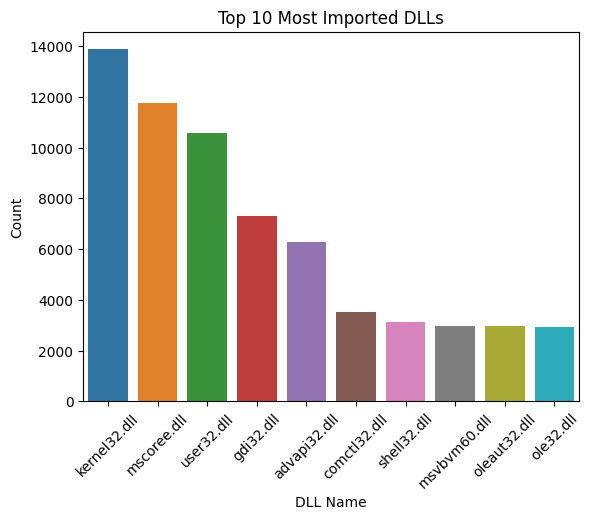

In [ ]:
# Select only numeric columns
numeric_dll_data = dll_data.select_dtypes(include=['number'])

if 'unique_dll_count' in numeric_dll_data.columns:
    numeric_dll_data = numeric_dll_data.drop(columns=['unique_dll_count', 'Type'])

# Calculate the sum of each DLL and sort in descending order
top_dlls = numeric_dll_data.sum().sort_values(ascending=False).head(10)

# Plot the top 10 DLLs
sns.barplot(x=top_dlls.index, y=top_dlls.values)
plt.title('Top 10 Most Imported DLLs')
plt.xticks(rotation=45)
plt.xlabel('DLL Name')
plt.ylabel('Count')
plt.show()

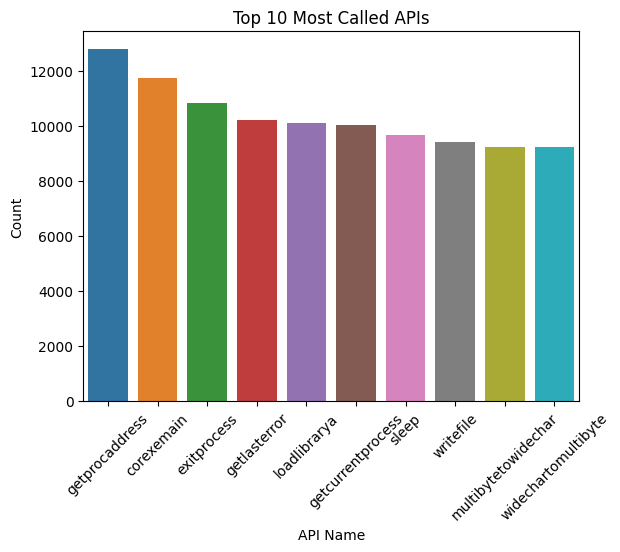

In [ ]:
# Select only numeric columns
numeric_api_data = api_data.select_dtypes(include=['number'])

if 'unique_api_count' in numeric_api_data.columns:
    numeric_api_data = numeric_api_data.drop(columns=['unique_api_count', 'Type'])

# Calculate the sum of each API and sort in descending order
top_apis = numeric_api_data.sum().sort_values(ascending=False).head(10)

# Plot the top 10 APIs
sns.barplot(x=top_apis.index, y=top_apis.values)
plt.title('Top 10 Most Called APIs')
plt.xticks(rotation=45)
plt.xlabel('API Name')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


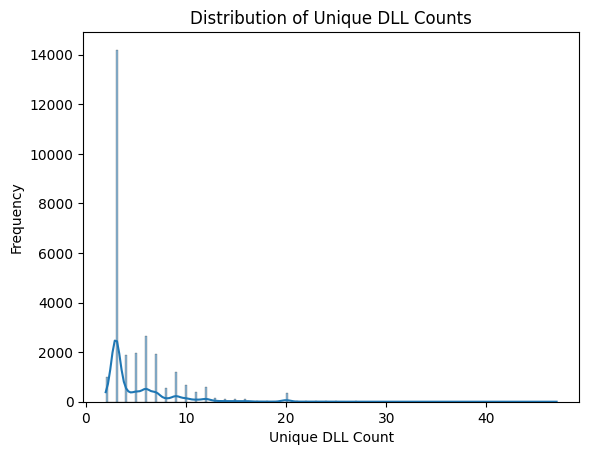

In [ ]:
#Distribution of Unique DLL Counts
sns.histplot(dll_data['unique_dll_count'], kde=True)
plt.title('Distribution of Unique DLL Counts')
plt.xlabel('Unique DLL Count')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


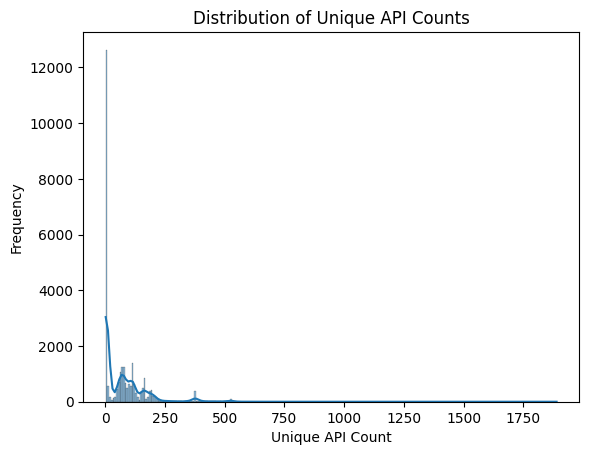

In [ ]:
#Distribution of Unique API Counts
sns.histplot(api_data['unique_api_count'], kde=True)
plt.title('Distribution of Unique API Counts')
plt.xlabel('Unique API Count')
plt.ylabel('Frequency')
plt.show()

Index(['SHA256', 'Type', 'e_magic', 'e_cblp', 'e_cp', 'e_crlc', 'e_cparhdr',
       'e_minalloc', 'e_maxalloc', 'e_ss',
       ...
       'pdata_Misc_VirtualSize', 'pdata_VirtualAddress', 'pdata_SizeOfRawData',
       'pdata_PointerToRawData', 'pdata_PointerToRelocations',
       'pdata_PointerToLinenumbers', 'pdata_NumberOfRelocations',
       'pdata_NumberOfLinenumbers', 'pdata_Characteristics',
       'section_entropy'],
      dtype='object', length=145)


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


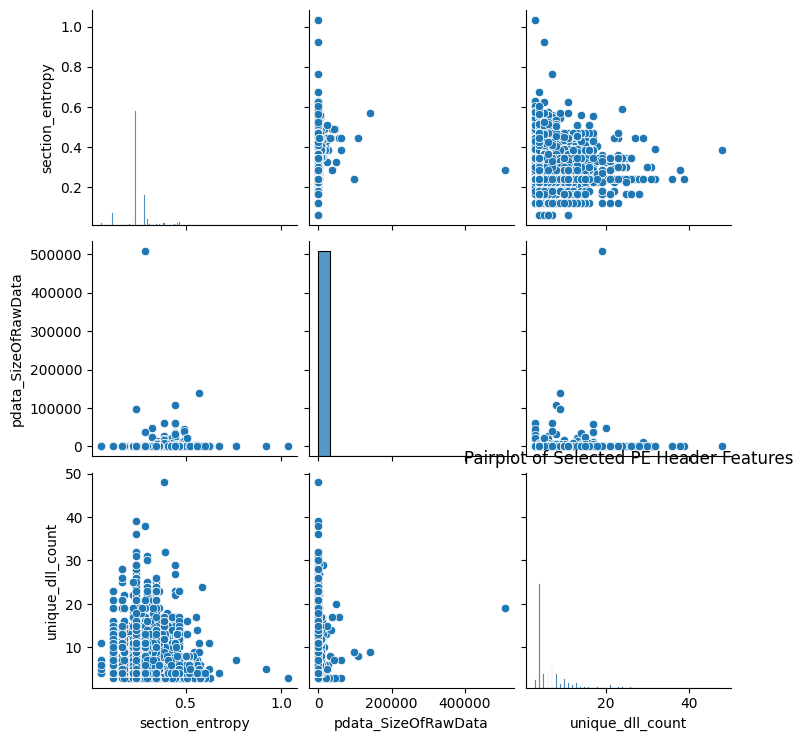

In [ ]:
# Check column names
print(pe_data.columns)

if 'unique_dll_count' not in pe_data.columns:
    pe_data['unique_dll_count'] = dll_data.astype(bool).sum(axis=1)

# Pairplot of Selected PE Header Features
sns.pairplot(pe_data[['section_entropy', 'pdata_SizeOfRawData', 'unique_dll_count']])
plt.title('Pairplot of Selected PE Header Features')
plt.show()

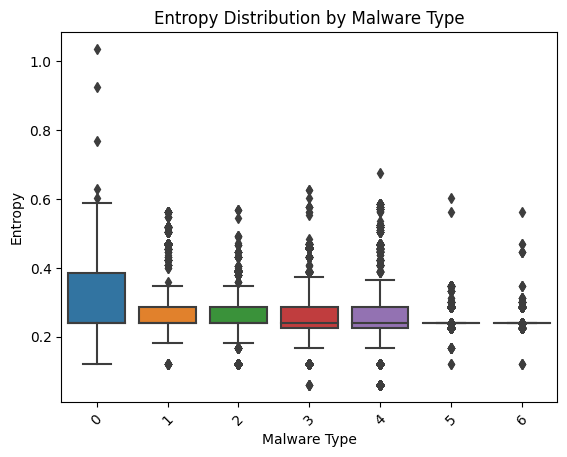

In [ ]:
#Box Plot of Entropy by Malware Type
sns.boxplot(x='Type', y='section_entropy', data=pe_data)
plt.title('Entropy Distribution by Malware Type')
plt.xticks(rotation=45)
plt.xlabel('Malware Type')
plt.ylabel('Entropy')
plt.show()

### RAM Cleanup

In [ ]:
#Cleaning Up the RAM here.
import matplotlib.pyplot as plt
import gc

del chunk_list
del chunks

gc.collect()

1113483

## Check For Missing Values

In [ ]:
# Check for missing values
print("PE Headers Missing Values:\n", pe_data.isnull().sum())
print("DLL Imports Missing Values:\n", dll_data.isnull().sum())
print("API Calls Missing Values:\n", api_data.isnull().sum())

# Example: Fill missing values with 0 (if appropriate)
pe_data.fillna(0, inplace=True)
dll_data.fillna(0, inplace=True)
api_data.fillna(0, inplace=True)

PE Headers Missing Values:
 SHA256                        0
Type                          0
e_magic                       0
e_cblp                        0
e_cp                          0
                             ..
pdata_PointerToRelocations    0
pdata_PointerToLinenumbers    0
pdata_NumberOfRelocations     0
pdata_NumberOfLinenumbers     0
pdata_Characteristics         0
Length: 144, dtype: int64
DLL Imports Missing Values:
 SHA256                                0
Type                                  0
advapi32.dll                          0
kernel32.dll                          0
vspmsg.dll                            0
                                     ..
api-ms-win-core-fibers-l1-1-0.dll     0
api-ms-win-core-file-l2-1-0.dll       0
api-ms-win-core-sysinfo-l1-2-0.dll    0
dbgeng.dll                            0
d3d11.dll                             0
Length: 631, dtype: int64
API Calls Missing Values:
 SHA256                                0
Type                            

## Merging the Datasets

In [ ]:
# Merge based on the first column
common_column = pe_data.columns[0]  # Assumes the first column is the common key
merged_df = pe_data.merge(dll_data, on=common_column).merge(api_data, on=common_column)

# Save the merged data to Kaggle's output folder
output_file = "/kaggle/working/merged.csv"
merged_df.to_csv(output_file, index=False)

print(f"Merged file saved at {output_file}")

Merged file saved at /kaggle/working/merged.csv


In [ ]:
merged_df.head()


,SHA256,Type_x,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,...,ord1107,wsasetblockinghook,setupinstallfileexa,setupterminatefilelog,setuplogfilew,setupopenmasterinf,setupinstallfileexw,setupgetlinecountw,setupdigethwprofilefriendlynameexw,unique_api_count
0,dacbe8cb72dd746539792a50e84965fefef73feaa07b5d...,0,23117,144,3,0,4,0,65535,0,...,0,0,0,0,0,0,0,0,0,2
1,d3dc7512ce75db33b2c3063fa99245e9ca9fe3b086462f...,0,23117,144,3,0,4,0,65535,0,...,0,0,0,0,0,0,0,0,0,2
2,b350fac81533f02981dc2176ed17163177d92d9405758e...,0,23117,144,3,0,4,0,65535,0,...,0,0,0,0,0,0,0,0,0,2
3,dfee618043a47b7b09305df0ca460559d9f567ee246c7b...,0,23117,144,3,0,4,0,65535,0,...,0,0,0,0,0,0,0,0,0,2
4,c7b2e4e4fb2fcc44c953673ff57c3d14bdf5d2008f35e9...,0,23117,144,3,0,4,0,65535,0,...,0,0,0,0,0,0,0,0,0,2


## Feature Engineering - Principal Component Analysis

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# File path for input dataset
file_path = "/content/drive/MyDrive/mined_dataset/merged.csv"
df = pd.read_csv(file_path)

# Separate SHA256 and Type columns
sha256_col = df["SHA256"] if "SHA256" in df.columns else None
type_col = df["Type"] if "Type" in df.columns else None

# Drop non-numeric columns
df_numeric = df.drop(columns=["SHA256", "Type"], errors="ignore")

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Compute explained variance for all components
pca_full = PCA().fit(df_scaled)
explained_variance_ratio = pca_full.explained_variance_ratio_

# Plot the scree plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.grid(True)
plt.show()

## Trying Out Different Models

### The Finalized Model.
After executing various models as given below we came to a conclusion to choose this model as the one, because of its exceptional performance and accuracy compared to other models.

### Conventional ML Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:

# Load PCA-transformed dataset
file_path = "/content/drive/MyDrive/mined_dataset/pca_merged.csv"
df_pca = pd.read_csv(file_path)

# Separate features and target
X = df_pca.drop(columns=["SHA256", "Type"], errors="ignore")  # Drop non-feature columns
y = df_pca["Type"] if "Type" in df_pca.columns else None  # Target variable

# Ensure target column exists
if y is None:
    raise ValueError("No 'Type' column found in dataset!")

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [3]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, C=0.3, penalty='l2'),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=6, min_samples_split=5, min_samples_leaf=3, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", max_depth=3, learning_rate=0.03, n_estimators=120, subsample=0.6, colsample_bytree=0.6, reg_lambda=15, reg_alpha=10),
    "SVM": SVC(C=0.8, kernel='rbf', gamma='scale'),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(50,25), max_iter=400, alpha=0.05, random_state=42)
}

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Accuracy: 0.6772, Precision: 0.7029, Recall: 0.6772, F1 Score: 0.6793


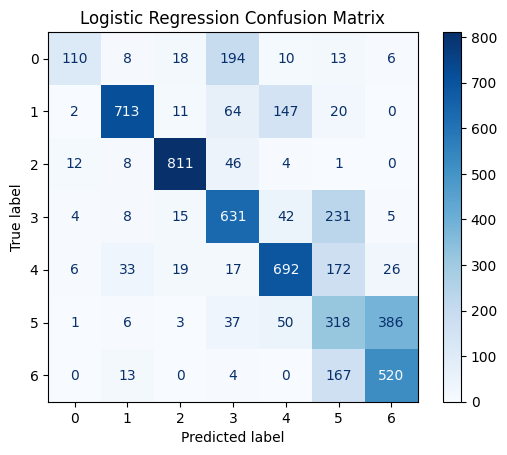

Random Forest - Accuracy: 0.9209, Precision: 0.9274, Recall: 0.9209, F1 Score: 0.9212


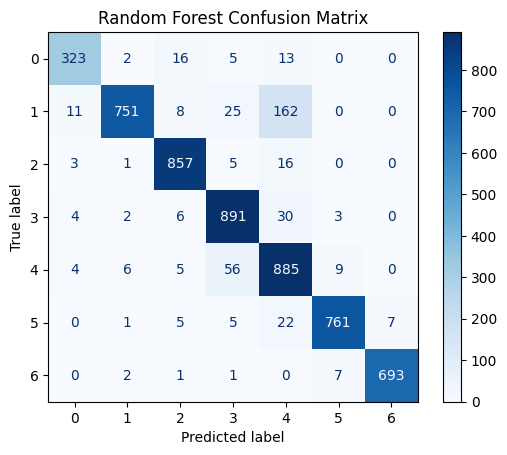

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:41:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.9118, Precision: 0.9132, Recall: 0.9118, F1 Score: 0.9117


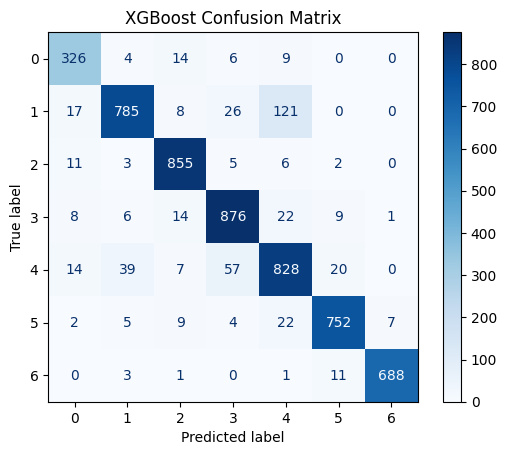

SVM - Accuracy: 0.5476, Precision: 0.6546, Recall: 0.5476, F1 Score: 0.5350


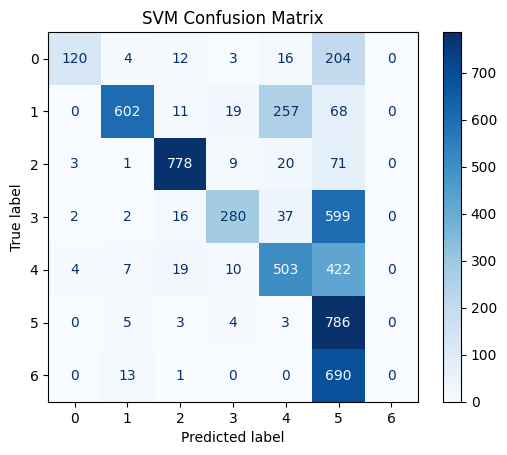

MLP Classifier - Accuracy: 0.9390, Precision: 0.9398, Recall: 0.9390, F1 Score: 0.9388


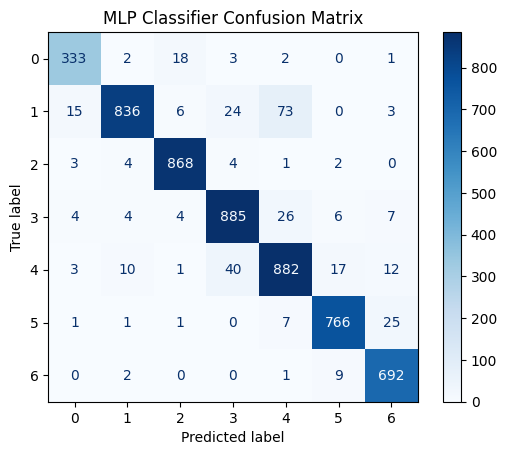

In [4]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Save metrics and confusion matrix
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

    # Display results
    print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{name} Confusion Matrix")
    plt.show()

In [8]:
# Save each model to a separate file
import pickle
for name, model in models.items():
  filename = f"/content/drive/MyDrive/mined_dataset/{name}.pkl"
  with open(filename, 'wb') as file:
    pickle.dump(model, file)
  print(f"Model '{name}' saved to {filename}")


Model 'Logistic Regression' saved to /content/drive/MyDrive/mined_dataset/Logistic Regression.pkl
Model 'Random Forest' saved to /content/drive/MyDrive/mined_dataset/Random Forest.pkl
Model 'XGBoost' saved to /content/drive/MyDrive/mined_dataset/XGBoost.pkl
Model 'SVM' saved to /content/drive/MyDrive/mined_dataset/SVM.pkl
Model 'MLP Classifier' saved to /content/drive/MyDrive/mined_dataset/MLP Classifier.pkl


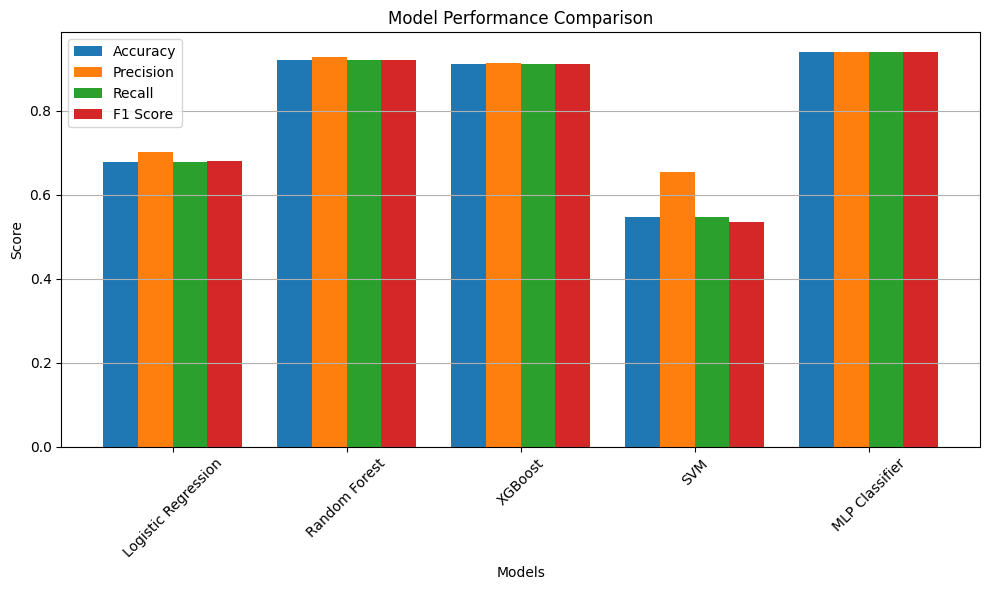

In [5]:
import matplotlib.pyplot as plt
# Assuming 'results' is a dictionary where the keys are model names and the values are dictionaries with metric scores
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
model_names = list(results.keys())

# Set up the bar width and positions
bar_width = 0.2
index = np.arange(len(model_names))

# Plot each metric as a separate bar plot
plt.figure(figsize=(10,6))
for i, metric in enumerate(metrics):
    plt.bar(index + i * bar_width, [results[model][metric] for model in model_names],
            bar_width, label=metric)

# Customizing the plot
plt.xticks(index + bar_width * (len(metrics) - 1) / 2, model_names, rotation=45)
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.grid(axis="y")

# Display the plot
plt.tight_layout()
plt.show()

### ConvLSTM Approach (CNN + LSTM)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [ ]:
# Step 1: Load & Preprocess Dataset
df = pd.read_csv("/content/drive/MyDrive/mined_dataset/pca_merged.csv")

# Extract target (y) and features (X)
y = df["Type"].values
df = df.drop(columns=["SHA256", "Type"], errors="ignore")
X = df.values

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle Class Imbalance using SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X_resampled, dtype=torch.float32)
y_tensor = torch.tensor(y_resampled, dtype=torch.long)  # Change to long for multiclass

# Split into Train & Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Create Dataloaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [ ]:
# Step 2: Define Hybrid Transformer + CNN + LSTM Model in PyTorch
class MalwareDetectionModel(nn.Module):
    def __init__(self, input_dim, num_classes=7):
        super(MalwareDetectionModel, self).__init__()

        # CNN Feature Extractor
        self.conv1 = nn.Conv1d(1, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(64, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv1d(128, 256, kernel_size=3, padding=1)
        self.batch_norm = nn.BatchNorm1d(256)
        self.pool = nn.MaxPool1d(kernel_size=2)

        # Transformer Encoder Layer
        self.self_attn = nn.MultiheadAttention(embed_dim=256, num_heads=4, batch_first=True)
        self.layer_norm = nn.LayerNorm(256)

        # LSTM Layer
        self.lstm = nn.LSTM(256, 128, batch_first=True, bidirectional=True)
        self.lstm_fc = nn.Linear(128 * 2, 64)

        # Fully Connected Layers
        self.fc1 = nn.Linear(64, 32)
        self.fc2 = nn.Linear(32, num_classes)  # Number of classes for multiclass output

    def forward(self, x):
        x = x.unsqueeze(1)  # Add a channel dimension for CNN

        # CNN Layers
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.batch_norm(x)

        # Transformer Layer
        x = x.permute(0, 2, 1)  # Reshape for transformer (batch, seq_len, feature_dim)
        attn_output, _ = self.self_attn(x, x, x)
        x = self.layer_norm(x + attn_output)

        # LSTM Layer
        x, _ = self.lstm(x)
        x = self.lstm_fc(x[:, -1, :])  # Take last LSTM output

        # Fully Connected Layers
        x = F.relu(self.fc1(x))
        x = self.fc2(x)  # No activation here, because CrossEntropyLoss applies softmax internally

        return x


In [23]:
class EarlyStopping:
    def __init__(self, patience=5, min_delta=0.001):
        self.patience = patience
        self.min_delta = min_delta
        self.best_loss = float("inf")
        self.counter = 0

    def check_early_stop(self, val_loss):
        if val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                return True  # Stop training
        return False

In [ ]:
# Step 3: Initialize Model, Optimizer & Loss
input_dim = X_train.shape[1]
num_classes = 7  # Since target is between 0 and 6
model = MalwareDetectionModel(input_dim, num_classes)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss for multiclass classification


In [ ]:
# Step 4: Cyclic Learning Rate (CLR)
def cyclic_lr(epoch, base_lr=0.0001, max_lr=0.001, step_size=10):
    cycle = np.floor(1 + epoch / (2 * step_size))
    x = np.abs(epoch / step_size - 2 * cycle + 1)
    return base_lr + (max_lr - base_lr) * max(0, (1 - x))


In [24]:
# Training Function with Early Stopping
def train_and_save_weights(model, train_loader, val_loader, optimizer, criterion, epochs=30, patience=5, save_path="/content/drive/MyDrive/mined_dataset/convlstm_model.pkl"):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.train()

    early_stopping = EarlyStopping(patience=patience)  # Initialize EarlyStopping

    for epoch in range(epochs):
        running_loss = 0.0
        correct, total = 0, 0

        # Training Phase
        model.train()
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            # Calculate Training Accuracy
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == targets).sum().item()
            total += targets.size(0)

        train_accuracy = correct / total
        avg_train_loss = running_loss / len(train_loader)

        # Validation Phase
        model.eval()
        val_loss = 0.0
        correct_val, total_val = 0, 0
        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item()

                # Calculate Validation Accuracy
                _, predicted = torch.max(outputs, 1)
                correct_val += (predicted == targets).sum().item()
                total_val += targets.size(0)

        avg_val_loss = val_loss / len(val_loader)
        val_accuracy = correct_val / total_val

        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}, Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

        # **Check for early stopping**
        if early_stopping.check_early_stop(avg_val_loss):
            print(f"Early stopping at epoch {epoch+1}")
            break

    # Save model weights
    torch.save(model.state_dict(), save_path)
    print(f"Model weights saved to {save_path}")


In [25]:
# Step 6: Evaluation Function
def evaluate(model, test_loader):
    model.eval()
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_labels.extend(targets.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    # Compute metrics
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted', zero_division=1)
    recall = recall_score(all_labels, all_preds, average='weighted', zero_division=1)
    f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=1)

    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


Epoch 1/30, Loss: 0.2014, Training Accuracy: 0.9297, Val Loss: 0.1986, Val Accuracy: 0.9400
Epoch 2/30, Loss: 0.2015, Training Accuracy: 0.9285, Val Loss: 0.2265, Val Accuracy: 0.9254
Epoch 3/30, Loss: 0.2295, Training Accuracy: 0.9172, Val Loss: 0.1926, Val Accuracy: 0.9440
Epoch 4/30, Loss: 0.2082, Training Accuracy: 0.9264, Val Loss: 0.2638, Val Accuracy: 0.8863
Epoch 5/30, Loss: 0.2065, Training Accuracy: 0.9293, Val Loss: 0.2427, Val Accuracy: 0.9189
Epoch 6/30, Loss: 0.1994, Training Accuracy: 0.9284, Val Loss: 0.1748, Val Accuracy: 0.9397
Epoch 7/30, Loss: 0.1856, Training Accuracy: 0.9360, Val Loss: 0.6008, Val Accuracy: 0.7742
Epoch 8/30, Loss: 0.2119, Training Accuracy: 0.9244, Val Loss: 0.3531, Val Accuracy: 0.8373
Epoch 9/30, Loss: 0.1705, Training Accuracy: 0.9410, Val Loss: 0.1633, Val Accuracy: 0.9473
Epoch 10/30, Loss: 0.1691, Training Accuracy: 0.9406, Val Loss: 0.3713, Val Accuracy: 0.8359
Epoch 11/30, Loss: 0.1604, Training Accuracy: 0.9437, Val Loss: 0.2296, Val Acc

<ipython-input-26-02fea7be0dbd>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/content/drive/MyDrive/mined_dataset/convlstm_model.pkl"))

Accuracy: 0.9491, Precision: 0.9506, Recall: 0.9491, F1-Score: 0.9491


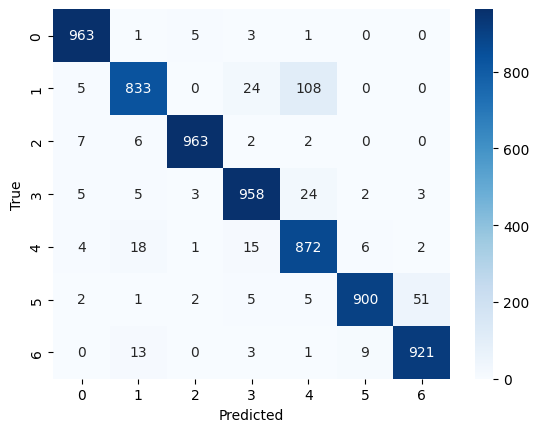

In [26]:
# Train & Evaluate Model
train_and_save_weights(model, train_loader, test_loader, optimizer, criterion)

# Load the best saved model weights
model.load_state_dict(torch.load("/content/drive/MyDrive/mined_dataset/convlstm_model.pkl"))

# Move model to the appropriate device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Evaluate the model
evaluate(model, test_loader)


In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
import pickle

# Load the trained MLP Classifier model
model_path = "/content/drive/MyDrive/mined_dataset/MLP Classifier.pkl"  # Replace with the actual path
with open(model_path, 'rb') as file:
    mlp_classifier = pickle.load(file)

# Load the unknown data CSV
unknown_data_path = "/content/drive/MyDrive/mined_dataset/pca_test.csv" # Replace with the path to your CSV file.
unknown_data = pd.read_csv(unknown_data_path)

# Preprocess the unknown data (same as training data)
sha256_column = unknown_data["SHA256"]

# Assuming the same features as the training set exist
X_unknown = unknown_data.drop(columns=["SHA256"], errors='ignore')

# Predict using the MLP classifier
predictions = mlp_classifier.predict(X_unknown)

# Create a new DataFrame with SHA256 and predicted types
results_df = pd.DataFrame({
    "SHA256": sha256_column,
    "Type": predictions
})

# Save the results
output_file = "/content/drive/MyDrive/mined_dataset/predicted_test.csv" # Replace with your desired output path
results_df.to_csv(output_file, index=False)

print(f"Predictions saved to {output_file}")


Predictions saved to /content/drive/MyDrive/mined_dataset/predicted_test.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install qiskit qiskit-machine-learning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.6/231.6 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 11.3 MB/s eta 0:00:00


In [ ]:
!pip install qiskit-ibm-runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.8/340.8 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 11.5 MB/s eta 0:00:00
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.27.2
    Uninstalling pydantic_core-2.27.2:
      Successfully uninstalled pydantic_core-2.27.2
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.10.6
    Uninstalling pydantic-2.10.6:
      Successfully uninstalled pydantic-2.10.6


In [ ]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 29.6 MB/s eta 0:00:00


In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Replace with your actual IBM Quantum API token
api_token = '3945309f97e2b06355941410478c1dbc8710b6b4af13702924b0ddf47b6717e03abd9cb5f65102c7075323604520c0f0ff2ec6714b761f09db71a78a394cb9b2'

# Save your account, specifying the channel if necessary
QiskitRuntimeService.save_account(api_token, channel='ibm_quantum', overwrite=True)

# Load the account
service = QiskitRuntimeService()

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import numpy as np
from xgboost import XGBClassifier


# Load your dataset (excluding SHA256 and Type columns)
df = pd.read_csv('/content/drive/MyDrive/mined_dataset/pca_merged_50.csv')

# Assuming that 'Type' is your target column
X = df.drop(columns=['SHA256', 'Type'])  # Features
y = df['Type']  # Target column

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for most ML models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
import gc
import torch
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/mined_dataset/pca_merged_50.csv')

# Extract features and labels
X = data.drop(columns=["SHA256", "Type"])
y = data["Type"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# XGBoost parameters for GPU training
xgb_params = {
    'objective': 'multi:softmax',  # Multi-class classification
    'num_class': len(np.unique(y)),  # Number of classes
    'eval_metric': 'mlogloss',
    'tree_method': 'gpu_hist',  # Enables GPU acceleration
    'predictor': 'gpu_predictor'
}

# Define batch size
batch_size = 100  # Adjust based on memory constraints
num_batches = len(X_train) // batch_size + (1 if len(X_train) % batch_size != 0 else 0)

# Initialize an empty XGBoost model
final_model = None

for i in range(num_batches):
    start = i * batch_size
    end = min((i + 1) * batch_size, len(X_train))

    print(f"\nTraining on batch {i+1}/{num_batches} ({start}-{end})")

    # Prepare batch data
    dtrain = xgb.DMatrix(X_train[start:end], label=y_train[start:end])

    # Train XGBoost model
    model = xgb.train(xgb_params, dtrain, num_boost_round=100, xgb_model=final_model)

    # Store the latest trained model for incremental learning
    final_model = model

    # Clear memory after each batch
    del dtrain
    gc.collect()
    torch.cuda.empty_cache()

    # Evaluate on test set
    dtest = xgb.DMatrix(X_test)
    y_pred = model.predict(dtest)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print batch-wise performance
    print(f"Batch {i+1} Accuracy: {accuracy:.4f}")
    print(f"Batch {i+1} Precision: {precision:.4f}")
    print(f"Batch {i+1} Recall: {recall:.4f}")
    print(f"Batch {i+1} F1-Score: {f1:.4f}")

# Save the final model
final_model.save_model('/content/xgboost_model.json')
print("\nFinal model saved successfully at /content/xgboost_model.json")



Training on batch 1/225 (0-100)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:20] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:22] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:22] WARNING: /workspace/src/common/error_ms

Batch 1 Accuracy: 0.6779
Batch 1 Precision: 0.7037
Batch 1 Recall: 0.6779
Batch 1 F1-Score: 0.6778

Training on batch 2/225 (100-200)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


Batch 2 Accuracy: 0.7380
Batch 2 Precision: 0.7651
Batch 2 Recall: 0.7380
Batch 2 F1-Score: 0.7416

Training on batch 3/225 (200-300)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:24] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 3 Accuracy: 0.7511
Batch 3 Precision: 0.7489
Batch 3 Recall: 0.7511
Batch 3 F1-Score: 0.7437

Training on batch 4/225 (300-400)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:24] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:26] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 4 Accuracy: 0.7639
Batch 4 Precision: 0.7866
Batch 4 Recall: 0.7639
Batch 4 F1-Score: 0.7628

Training on batch 5/225 (400-500)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:26] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:27] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 5 Accuracy: 0.8005
Batch 5 Precision: 0.8107
Batch 5 Recall: 0.8005
Batch 5 F1-Score: 0.8023

Training on batch 6/225 (500-600)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:28] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:29] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 6 Accuracy: 0.7993
Batch 6 Precision: 0.8071
Batch 6 Recall: 0.7993
Batch 6 F1-Score: 0.7992

Training on batch 7/225 (600-700)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:30] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:32] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 7 Accuracy: 0.7930
Batch 7 Precision: 0.8047
Batch 7 Recall: 0.7930
Batch 7 F1-Score: 0.7956

Training on batch 8/225 (700-800)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:33] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


Batch 8 Accuracy: 0.7703
Batch 8 Precision: 0.7757
Batch 8 Recall: 0.7703
Batch 8 F1-Score: 0.7674

Training on batch 9/225 (800-900)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:33] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:34] WARNING: /workspace/src/common/error_ms

Batch 9 Accuracy: 0.7852
Batch 9 Precision: 0.8029
Batch 9 Recall: 0.7852
Batch 9 F1-Score: 0.7883

Training on batch 10/225 (900-1000)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 10 Accuracy: 0.7930
Batch 10 Precision: 0.8025
Batch 10 Recall: 0.7930
Batch 10 F1-Score: 0.7958

Training on batch 11/225 (1000-1100)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:36] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 11 Accuracy: 0.7948
Batch 11 Precision: 0.8047
Batch 11 Recall: 0.7948
Batch 11 F1-Score: 0.7976

Training on batch 12/225 (1100-1200)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:36] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:37] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 12 Accuracy: 0.8034
Batch 12 Precision: 0.8056
Batch 12 Recall: 0.8034
Batch 12 F1-Score: 0.8017

Training on batch 13/225 (1200-1300)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:37] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:38] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 13 Accuracy: 0.8017
Batch 13 Precision: 0.8147
Batch 13 Recall: 0.8017
Batch 13 F1-Score: 0.8046

Training on batch 14/225 (1300-1400)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:38] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:39] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 14 Accuracy: 0.7934
Batch 14 Precision: 0.7959
Batch 14 Recall: 0.7934
Batch 14 F1-Score: 0.7935

Training on batch 15/225 (1400-1500)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:39] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:40] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 15 Accuracy: 0.7884
Batch 15 Precision: 0.7910
Batch 15 Recall: 0.7884
Batch 15 F1-Score: 0.7873

Training on batch 16/225 (1500-1600)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:40] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:41] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 16 Accuracy: 0.7850
Batch 16 Precision: 0.7894
Batch 16 Recall: 0.7850
Batch 16 F1-Score: 0.7816

Training on batch 17/225 (1600-1700)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:41] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:42] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 17 Accuracy: 0.7939
Batch 17 Precision: 0.8008
Batch 17 Recall: 0.7939
Batch 17 F1-Score: 0.7921

Training on batch 18/225 (1700-1800)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:42] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:43] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 18 Accuracy: 0.8164
Batch 18 Precision: 0.8248
Batch 18 Recall: 0.8164
Batch 18 F1-Score: 0.8180

Training on batch 19/225 (1800-1900)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:44] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:45] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 19 Accuracy: 0.8133
Batch 19 Precision: 0.8218
Batch 19 Recall: 0.8133
Batch 19 F1-Score: 0.8122

Training on batch 20/225 (1900-2000)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:46] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:47] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 20 Accuracy: 0.7885
Batch 20 Precision: 0.8028
Batch 20 Recall: 0.7885
Batch 20 F1-Score: 0.7906

Training on batch 21/225 (2000-2100)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:47] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:48] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 21 Accuracy: 0.8084
Batch 21 Precision: 0.8100
Batch 21 Recall: 0.8084
Batch 21 F1-Score: 0.8084

Training on batch 22/225 (2100-2200)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:49] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 22 Accuracy: 0.8133
Batch 22 Precision: 0.8315
Batch 22 Recall: 0.8133
Batch 22 F1-Score: 0.8141

Training on batch 23/225 (2200-2300)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 23 Accuracy: 0.7953
Batch 23 Precision: 0.8021
Batch 23 Recall: 0.7953
Batch 23 F1-Score: 0.7949

Training on batch 24/225 (2300-2400)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:52] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 24 Accuracy: 0.8119
Batch 24 Precision: 0.8166
Batch 24 Recall: 0.8119
Batch 24 F1-Score: 0.8111

Training on batch 25/225 (2400-2500)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:53] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 25 Accuracy: 0.8057
Batch 25 Precision: 0.8193
Batch 25 Recall: 0.8057
Batch 25 F1-Score: 0.8079

Training on batch 26/225 (2500-2600)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:55] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 26 Accuracy: 0.8025
Batch 26 Precision: 0.8125
Batch 26 Recall: 0.8025
Batch 26 F1-Score: 0.8006

Training on batch 27/225 (2600-2700)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:56] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:57] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 27 Accuracy: 0.8023
Batch 27 Precision: 0.8055
Batch 27 Recall: 0.8023
Batch 27 F1-Score: 0.8015

Training on batch 28/225 (2700-2800)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:58] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:00] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 28 Accuracy: 0.7928
Batch 28 Precision: 0.8105
Batch 28 Recall: 0.7928
Batch 28 F1-Score: 0.7944

Training on batch 29/225 (2800-2900)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:01] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:02] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 29 Accuracy: 0.8224
Batch 29 Precision: 0.8239
Batch 29 Recall: 0.8224
Batch 29 F1-Score: 0.8226

Training on batch 30/225 (2900-3000)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:02] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:03] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 30 Accuracy: 0.8066
Batch 30 Precision: 0.8112
Batch 30 Recall: 0.8066
Batch 30 F1-Score: 0.8038

Training on batch 31/225 (3000-3100)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:05] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 31 Accuracy: 0.8358
Batch 31 Precision: 0.8363
Batch 31 Recall: 0.8358
Batch 31 F1-Score: 0.8348

Training on batch 32/225 (3100-3200)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:06] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:07] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 32 Accuracy: 0.8355
Batch 32 Precision: 0.8418
Batch 32 Recall: 0.8355
Batch 32 F1-Score: 0.8370

Training on batch 33/225 (3200-3300)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:07] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 33 Accuracy: 0.8139
Batch 33 Precision: 0.8288
Batch 33 Recall: 0.8139
Batch 33 F1-Score: 0.8156

Training on batch 34/225 (3300-3400)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:10] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 34 Accuracy: 0.8205
Batch 34 Precision: 0.8270
Batch 34 Recall: 0.8205
Batch 34 F1-Score: 0.8217

Training on batch 35/225 (3400-3500)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:11] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:13] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 35 Accuracy: 0.8276
Batch 35 Precision: 0.8353
Batch 35 Recall: 0.8276
Batch 35 F1-Score: 0.8278

Training on batch 36/225 (3500-3600)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:14] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:16] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 36 Accuracy: 0.8230
Batch 36 Precision: 0.8262
Batch 36 Recall: 0.8230
Batch 36 F1-Score: 0.8230

Training on batch 37/225 (3600-3700)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:16] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:18] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 37 Accuracy: 0.7987
Batch 37 Precision: 0.8213
Batch 37 Recall: 0.7987
Batch 37 F1-Score: 0.8003

Training on batch 38/225 (3700-3800)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:18] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:20] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 38 Accuracy: 0.8267
Batch 38 Precision: 0.8329
Batch 38 Recall: 0.8267
Batch 38 F1-Score: 0.8266

Training on batch 39/225 (3800-3900)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:20] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:22] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 39 Accuracy: 0.8167
Batch 39 Precision: 0.8316
Batch 39 Recall: 0.8167
Batch 39 F1-Score: 0.8204

Training on batch 40/225 (3900-4000)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:24] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 40 Accuracy: 0.8380
Batch 40 Precision: 0.8437
Batch 40 Recall: 0.8380
Batch 40 F1-Score: 0.8390

Training on batch 41/225 (4000-4100)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:25] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:27] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 41 Accuracy: 0.8346
Batch 41 Precision: 0.8417
Batch 41 Recall: 0.8346
Batch 41 F1-Score: 0.8363

Training on batch 42/225 (4100-4200)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:28] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:29] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 42 Accuracy: 0.8139
Batch 42 Precision: 0.8257
Batch 42 Recall: 0.8139
Batch 42 F1-Score: 0.8165

Training on batch 43/225 (4200-4300)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:30] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:32] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 43 Accuracy: 0.7968
Batch 43 Precision: 0.8096
Batch 43 Recall: 0.7968
Batch 43 F1-Score: 0.7987

Training on batch 44/225 (4300-4400)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:33] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 44 Accuracy: 0.8239
Batch 44 Precision: 0.8346
Batch 44 Recall: 0.8239
Batch 44 F1-Score: 0.8255

Training on batch 45/225 (4400-4500)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:36] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 45 Accuracy: 0.8465
Batch 45 Precision: 0.8494
Batch 45 Recall: 0.8465
Batch 45 F1-Score: 0.8472

Training on batch 46/225 (4500-4600)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:37] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:38] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 46 Accuracy: 0.8473
Batch 46 Precision: 0.8495
Batch 46 Recall: 0.8473
Batch 46 F1-Score: 0.8477

Training on batch 47/225 (4600-4700)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:40] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:42] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 47 Accuracy: 0.8369
Batch 47 Precision: 0.8420
Batch 47 Recall: 0.8369
Batch 47 F1-Score: 0.8360

Training on batch 48/225 (4700-4800)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:43] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:44] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 48 Accuracy: 0.8207
Batch 48 Precision: 0.8329
Batch 48 Recall: 0.8207
Batch 48 F1-Score: 0.8208

Training on batch 49/225 (4800-4900)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:46] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:47] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 49 Accuracy: 0.8096
Batch 49 Precision: 0.8411
Batch 49 Recall: 0.8096
Batch 49 F1-Score: 0.8162

Training on batch 50/225 (4900-5000)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:48] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:49] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 50 Accuracy: 0.8310
Batch 50 Precision: 0.8335
Batch 50 Recall: 0.8310
Batch 50 F1-Score: 0.8314

Training on batch 51/225 (5000-5100)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:52] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 51 Accuracy: 0.8333
Batch 51 Precision: 0.8398
Batch 51 Recall: 0.8333
Batch 51 F1-Score: 0.8331

Training on batch 52/225 (5100-5200)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:56] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 52 Accuracy: 0.8178
Batch 52 Precision: 0.8265
Batch 52 Recall: 0.8178
Batch 52 F1-Score: 0.8165

Training on batch 53/225 (5200-5300)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:57] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:32:59] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 53 Accuracy: 0.8084
Batch 53 Precision: 0.8142
Batch 53 Recall: 0.8084
Batch 53 F1-Score: 0.7966

Training on batch 54/225 (5300-5400)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:00] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:02] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 54 Accuracy: 0.8084
Batch 54 Precision: 0.8142
Batch 54 Recall: 0.8084
Batch 54 F1-Score: 0.7966

Training on batch 55/225 (5400-5500)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:03] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 55 Accuracy: 0.8084
Batch 55 Precision: 0.8142
Batch 55 Recall: 0.8084
Batch 55 F1-Score: 0.7966

Training on batch 56/225 (5500-5600)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:06] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 56 Accuracy: 0.8258
Batch 56 Precision: 0.8581
Batch 56 Recall: 0.8258
Batch 56 F1-Score: 0.8313

Training on batch 57/225 (5600-5700)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:10] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:12] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 57 Accuracy: 0.8444
Batch 57 Precision: 0.8524
Batch 57 Recall: 0.8444
Batch 57 F1-Score: 0.8466

Training on batch 58/225 (5700-5800)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:13] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:15] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 58 Accuracy: 0.8021
Batch 58 Precision: 0.8062
Batch 58 Recall: 0.8021
Batch 58 F1-Score: 0.7938

Training on batch 59/225 (5800-5900)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:16] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:18] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 59 Accuracy: 0.8292
Batch 59 Precision: 0.8391
Batch 59 Recall: 0.8292
Batch 59 F1-Score: 0.8319

Training on batch 60/225 (5900-6000)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:19] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:21] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 60 Accuracy: 0.8173
Batch 60 Precision: 0.8366
Batch 60 Recall: 0.8173
Batch 60 F1-Score: 0.8219

Training on batch 61/225 (6000-6100)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:25] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 61 Accuracy: 0.8292
Batch 61 Precision: 0.8473
Batch 61 Recall: 0.8292
Batch 61 F1-Score: 0.8327

Training on batch 62/225 (6100-6200)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:27] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:28] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 62 Accuracy: 0.8324
Batch 62 Precision: 0.8368
Batch 62 Recall: 0.8324
Batch 62 F1-Score: 0.8325

Training on batch 63/225 (6200-6300)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:30] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 63 Accuracy: 0.8364
Batch 63 Precision: 0.8376
Batch 63 Recall: 0.8364
Batch 63 F1-Score: 0.8358

Training on batch 64/225 (6300-6400)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:33] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 64 Accuracy: 0.8464
Batch 64 Precision: 0.8524
Batch 64 Recall: 0.8464
Batch 64 F1-Score: 0.8480

Training on batch 65/225 (6400-6500)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:37] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:39] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 65 Accuracy: 0.8394
Batch 65 Precision: 0.8453
Batch 65 Recall: 0.8394
Batch 65 F1-Score: 0.8408

Training on batch 66/225 (6500-6600)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:41] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:42] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 66 Accuracy: 0.8415
Batch 66 Precision: 0.8442
Batch 66 Recall: 0.8415
Batch 66 F1-Score: 0.8420

Training on batch 67/225 (6600-6700)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:44] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:46] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 67 Accuracy: 0.8524
Batch 67 Precision: 0.8622
Batch 67 Recall: 0.8524
Batch 67 F1-Score: 0.8543

Training on batch 68/225 (6700-6800)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:47] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 68 Accuracy: 0.8424
Batch 68 Precision: 0.8559
Batch 68 Recall: 0.8424
Batch 68 F1-Score: 0.8430

Training on batch 69/225 (6800-6900)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:52] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 69 Accuracy: 0.8392
Batch 69 Precision: 0.8585
Batch 69 Recall: 0.8392
Batch 69 F1-Score: 0.8419

Training on batch 70/225 (6900-7000)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:55] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:57] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 70 Accuracy: 0.8358
Batch 70 Precision: 0.8439
Batch 70 Recall: 0.8358
Batch 70 F1-Score: 0.8366

Training on batch 71/225 (7000-7100)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:59] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:33:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:01] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 71 Accuracy: 0.8223
Batch 71 Precision: 0.8426
Batch 71 Recall: 0.8223
Batch 71 F1-Score: 0.8266

Training on batch 72/225 (7100-7200)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:02] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:05] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 72 Accuracy: 0.8378
Batch 72 Precision: 0.8578
Batch 72 Recall: 0.8378
Batch 72 F1-Score: 0.8396

Training on batch 73/225 (7200-7300)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:07] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 73 Accuracy: 0.8326
Batch 73 Precision: 0.8368
Batch 73 Recall: 0.8326
Batch 73 F1-Score: 0.8332

Training on batch 74/225 (7300-7400)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:11] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:13] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 74 Accuracy: 0.8307
Batch 74 Precision: 0.8358
Batch 74 Recall: 0.8307
Batch 74 F1-Score: 0.8316

Training on batch 75/225 (7400-7500)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:14] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:16] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 75 Accuracy: 0.8344
Batch 75 Precision: 0.8365
Batch 75 Recall: 0.8344
Batch 75 F1-Score: 0.8349

Training on batch 76/225 (7500-7600)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:19] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:21] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 76 Accuracy: 0.8242
Batch 76 Precision: 0.8300
Batch 76 Recall: 0.8242
Batch 76 F1-Score: 0.8258

Training on batch 77/225 (7600-7700)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:25] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 77 Accuracy: 0.8298
Batch 77 Precision: 0.8308
Batch 77 Recall: 0.8298
Batch 77 F1-Score: 0.8291

Training on batch 78/225 (7700-7800)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:27] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:29] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 78 Accuracy: 0.8274
Batch 78 Precision: 0.8322
Batch 78 Recall: 0.8274
Batch 78 F1-Score: 0.8288

Training on batch 79/225 (7800-7900)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 79 Accuracy: 0.8321
Batch 79 Precision: 0.8342
Batch 79 Recall: 0.8321
Batch 79 F1-Score: 0.8324

Training on batch 80/225 (7900-8000)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:36] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:38] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 80 Accuracy: 0.8321
Batch 80 Precision: 0.8339
Batch 80 Recall: 0.8321
Batch 80 F1-Score: 0.8312

Training on batch 81/225 (8000-8100)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:40] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:42] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 81 Accuracy: 0.8239
Batch 81 Precision: 0.8348
Batch 81 Recall: 0.8239
Batch 81 F1-Score: 0.8247

Training on batch 82/225 (8100-8200)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:43] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:47] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 82 Accuracy: 0.8280
Batch 82 Precision: 0.8383
Batch 82 Recall: 0.8280
Batch 82 F1-Score: 0.8313

Training on batch 83/225 (8200-8300)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:49] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 83 Accuracy: 0.8292
Batch 83 Precision: 0.8393
Batch 83 Recall: 0.8292
Batch 83 F1-Score: 0.8324

Training on batch 84/225 (8300-8400)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:53] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:55] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 84 Accuracy: 0.8410
Batch 84 Precision: 0.8442
Batch 84 Recall: 0.8410
Batch 84 F1-Score: 0.8421

Training on batch 85/225 (8400-8500)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:57] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:34:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:00] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 85 Accuracy: 0.8424
Batch 85 Precision: 0.8496
Batch 85 Recall: 0.8424
Batch 85 F1-Score: 0.8446

Training on batch 86/225 (8500-8600)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:02] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 86 Accuracy: 0.8339
Batch 86 Precision: 0.8373
Batch 86 Recall: 0.8339
Batch 86 F1-Score: 0.8348

Training on batch 87/225 (8600-8700)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:06] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 87 Accuracy: 0.8032
Batch 87 Precision: 0.8263
Batch 87 Recall: 0.8032
Batch 87 F1-Score: 0.8081

Training on batch 88/225 (8700-8800)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:10] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:13] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 88 Accuracy: 0.8253
Batch 88 Precision: 0.8363
Batch 88 Recall: 0.8253
Batch 88 F1-Score: 0.8279

Training on batch 89/225 (8800-8900)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:16] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:18] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 89 Accuracy: 0.8319
Batch 89 Precision: 0.8387
Batch 89 Recall: 0.8319
Batch 89 F1-Score: 0.8338

Training on batch 90/225 (8900-9000)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:20] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 90 Accuracy: 0.8198
Batch 90 Precision: 0.8313
Batch 90 Recall: 0.8198
Batch 90 F1-Score: 0.8227

Training on batch 91/225 (9000-9100)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:25] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:28] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 91 Accuracy: 0.8371
Batch 91 Precision: 0.8422
Batch 91 Recall: 0.8371
Batch 91 F1-Score: 0.8388

Training on batch 92/225 (9100-9200)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:30] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:33] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 92 Accuracy: 0.8167
Batch 92 Precision: 0.8252
Batch 92 Recall: 0.8167
Batch 92 F1-Score: 0.8166

Training on batch 93/225 (9200-9300)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:37] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 93 Accuracy: 0.8323
Batch 93 Precision: 0.8391
Batch 93 Recall: 0.8323
Batch 93 F1-Score: 0.8338

Training on batch 94/225 (9300-9400)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:39] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:43] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 94 Accuracy: 0.8287
Batch 94 Precision: 0.8376
Batch 94 Recall: 0.8287
Batch 94 F1-Score: 0.8311

Training on batch 95/225 (9400-9500)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:45] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:48] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 95 Accuracy: 0.8383
Batch 95 Precision: 0.8440
Batch 95 Recall: 0.8383
Batch 95 F1-Score: 0.8391

Training on batch 96/225 (9500-9600)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:52] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 96 Accuracy: 0.8433
Batch 96 Precision: 0.8483
Batch 96 Recall: 0.8433
Batch 96 F1-Score: 0.8445

Training on batch 97/225 (9600-9700)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:55] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:35:58] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 97 Accuracy: 0.8283
Batch 97 Precision: 0.8301
Batch 97 Recall: 0.8283
Batch 97 F1-Score: 0.8266

Training on batch 98/225 (9700-9800)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:00] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:03] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 98 Accuracy: 0.8387
Batch 98 Precision: 0.8387
Batch 98 Recall: 0.8387
Batch 98 F1-Score: 0.8374

Training on batch 99/225 (9800-9900)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:05] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 99 Accuracy: 0.8451
Batch 99 Precision: 0.8463
Batch 99 Recall: 0.8451
Batch 99 F1-Score: 0.8449

Training on batch 100/225 (9900-10000)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:11] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:14] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 100 Accuracy: 0.8362
Batch 100 Precision: 0.8406
Batch 100 Recall: 0.8362
Batch 100 F1-Score: 0.8366

Training on batch 101/225 (10000-10100)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:16] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:19] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 101 Accuracy: 0.8399
Batch 101 Precision: 0.8463
Batch 101 Recall: 0.8399
Batch 101 F1-Score: 0.8411

Training on batch 102/225 (10100-10200)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:21] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:25] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 102 Accuracy: 0.8415
Batch 102 Precision: 0.8569
Batch 102 Recall: 0.8415
Batch 102 F1-Score: 0.8442

Training on batch 103/225 (10200-10300)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:27] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:30] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 103 Accuracy: 0.8403
Batch 103 Precision: 0.8519
Batch 103 Recall: 0.8403
Batch 103 F1-Score: 0.8426

Training on batch 104/225 (10300-10400)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:32] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 104 Accuracy: 0.8135
Batch 104 Precision: 0.8373
Batch 104 Recall: 0.8135
Batch 104 F1-Score: 0.8178

Training on batch 105/225 (10400-10500)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:39] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:42] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 105 Accuracy: 0.8301
Batch 105 Precision: 0.8415
Batch 105 Recall: 0.8301
Batch 105 F1-Score: 0.8324

Training on batch 106/225 (10500-10600)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:44] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:47] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 106 Accuracy: 0.8421
Batch 106 Precision: 0.8492
Batch 106 Recall: 0.8421
Batch 106 F1-Score: 0.8441

Training on batch 107/225 (10600-10700)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:49] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 107 Accuracy: 0.8332
Batch 107 Precision: 0.8468
Batch 107 Recall: 0.8332
Batch 107 F1-Score: 0.8360

Training on batch 108/225 (10700-10800)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:56] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:36:59] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 108 Accuracy: 0.8383
Batch 108 Precision: 0.8473
Batch 108 Recall: 0.8383
Batch 108 F1-Score: 0.8404

Training on batch 109/225 (10800-10900)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:01] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 109 Accuracy: 0.8373
Batch 109 Precision: 0.8514
Batch 109 Recall: 0.8373
Batch 109 F1-Score: 0.8410

Training on batch 110/225 (10900-11000)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:11] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 110 Accuracy: 0.8410
Batch 110 Precision: 0.8534
Batch 110 Recall: 0.8410
Batch 110 F1-Score: 0.8443

Training on batch 111/225 (11000-11100)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:13] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:16] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 111 Accuracy: 0.8280
Batch 111 Precision: 0.8383
Batch 111 Recall: 0.8280
Batch 111 F1-Score: 0.8284

Training on batch 112/225 (11100-11200)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:19] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 112 Accuracy: 0.8433
Batch 112 Precision: 0.8507
Batch 112 Recall: 0.8433
Batch 112 F1-Score: 0.8453

Training on batch 113/225 (11200-11300)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:25] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:28] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 113 Accuracy: 0.8285
Batch 113 Precision: 0.8363
Batch 113 Recall: 0.8285
Batch 113 F1-Score: 0.8289

Training on batch 114/225 (11300-11400)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:30] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 114 Accuracy: 0.8301
Batch 114 Precision: 0.8338
Batch 114 Recall: 0.8301
Batch 114 F1-Score: 0.8307

Training on batch 115/225 (11400-11500)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:37] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:40] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 115 Accuracy: 0.8312
Batch 115 Precision: 0.8346
Batch 115 Recall: 0.8312
Batch 115 F1-Score: 0.8317

Training on batch 116/225 (11500-11600)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:43] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:46] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 116 Accuracy: 0.8330
Batch 116 Precision: 0.8380
Batch 116 Recall: 0.8330
Batch 116 F1-Score: 0.8338

Training on batch 117/225 (11600-11700)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:53] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 117 Accuracy: 0.8378
Batch 117 Precision: 0.8442
Batch 117 Recall: 0.8378
Batch 117 F1-Score: 0.8396

Training on batch 118/225 (11700-11800)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:55] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:37:58] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 118 Accuracy: 0.8157
Batch 118 Precision: 0.8340
Batch 118 Recall: 0.8157
Batch 118 F1-Score: 0.8194

Training on batch 119/225 (11800-11900)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:38:01] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:38:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:38:05] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 119 Accuracy: 0.8219
Batch 119 Precision: 0.8331
Batch 119 Recall: 0.8219
Batch 119 F1-Score: 0.8244

Training on batch 120/225 (11900-12000)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:38:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:38:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:38:11] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 120 Accuracy: 0.8230
Batch 120 Precision: 0.8324
Batch 120 Recall: 0.8230
Batch 120 F1-Score: 0.8246

Training on batch 121/225 (12000-12100)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:38:13] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:38:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:38:18] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 121 Accuracy: 0.8246
Batch 121 Precision: 0.8431
Batch 121 Recall: 0.8246
Batch 121 F1-Score: 0.8285

Training on batch 122/225 (12100-12200)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:38:20] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:38:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:38:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 122 Accuracy: 0.8260
Batch 122 Precision: 0.8473
Batch 122 Recall: 0.8260
Batch 122 F1-Score: 0.8308

Training on batch 123/225 (12200-12300)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:38:26] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:38:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:38:30] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 123 Accuracy: 0.8260
Batch 123 Precision: 0.8473
Batch 123 Recall: 0.8260
Batch 123 F1-Score: 0.8308

Training on batch 124/225 (12300-12400)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:38:33] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:38:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:38:36] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 124 Accuracy: 0.8258
Batch 124 Precision: 0.8385
Batch 124 Recall: 0.8258
Batch 124 F1-Score: 0.8283

Training on batch 125/225 (12400-12500)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:38:39] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:38:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:38:42] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 125 Accuracy: 0.8323
Batch 125 Precision: 0.8360
Batch 125 Recall: 0.8323
Batch 125 F1-Score: 0.8326

Training on batch 126/225 (12500-12600)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:38:46] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:38:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:38:49] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 126 Accuracy: 0.8323
Batch 126 Precision: 0.8357
Batch 126 Recall: 0.8323
Batch 126 F1-Score: 0.8325

Training on batch 127/225 (12600-12700)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:38:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:38:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:38:55] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 127 Accuracy: 0.8178
Batch 127 Precision: 0.8185
Batch 127 Recall: 0.8178
Batch 127 F1-Score: 0.8128

Training on batch 128/225 (12700-12800)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:38:59] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:38:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:39:02] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 128 Accuracy: 0.8292
Batch 128 Precision: 0.8346
Batch 128 Recall: 0.8292
Batch 128 F1-Score: 0.8288

Training on batch 129/225 (12800-12900)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:39:05] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:39:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:39:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 129 Accuracy: 0.8333
Batch 129 Precision: 0.8336
Batch 129 Recall: 0.8333
Batch 129 F1-Score: 0.8327

Training on batch 130/225 (12900-13000)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:39:11] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:39:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:39:15] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 130 Accuracy: 0.8283
Batch 130 Precision: 0.8320
Batch 130 Recall: 0.8283
Batch 130 F1-Score: 0.8277

Training on batch 131/225 (13000-13100)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:39:18] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:39:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:39:21] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 131 Accuracy: 0.8196
Batch 131 Precision: 0.8267
Batch 131 Recall: 0.8196
Batch 131 F1-Score: 0.8198

Training on batch 132/225 (13100-13200)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:39:25] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:39:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:39:29] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 132 Accuracy: 0.8157
Batch 132 Precision: 0.8281
Batch 132 Recall: 0.8157
Batch 132 F1-Score: 0.8171

Training on batch 133/225 (13200-13300)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:39:32] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:39:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:39:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 133 Accuracy: 0.8396
Batch 133 Precision: 0.8470
Batch 133 Recall: 0.8396
Batch 133 F1-Score: 0.8416

Training on batch 134/225 (13300-13400)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:39:39] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:39:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:39:42] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 134 Accuracy: 0.8101
Batch 134 Precision: 0.8235
Batch 134 Recall: 0.8101
Batch 134 F1-Score: 0.8104

Training on batch 135/225 (13400-13500)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:39:45] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:39:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:39:49] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 135 Accuracy: 0.8314
Batch 135 Precision: 0.8337
Batch 135 Recall: 0.8314
Batch 135 F1-Score: 0.8314

Training on batch 136/225 (13500-13600)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:39:53] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:39:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:39:56] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 136 Accuracy: 0.8465
Batch 136 Precision: 0.8526
Batch 136 Recall: 0.8465
Batch 136 F1-Score: 0.8480

Training on batch 137/225 (13600-13700)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:39:59] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:39:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:40:03] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 137 Accuracy: 0.8460
Batch 137 Precision: 0.8503
Batch 137 Recall: 0.8460
Batch 137 F1-Score: 0.8473

Training on batch 138/225 (13700-13800)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:40:07] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:40:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:40:10] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 138 Accuracy: 0.8332
Batch 138 Precision: 0.8396
Batch 138 Recall: 0.8332
Batch 138 F1-Score: 0.8342

Training on batch 139/225 (13800-13900)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:40:13] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:40:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:40:17] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 139 Accuracy: 0.8439
Batch 139 Precision: 0.8531
Batch 139 Recall: 0.8439
Batch 139 F1-Score: 0.8461

Training on batch 140/225 (13900-14000)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:40:21] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:40:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:40:25] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 140 Accuracy: 0.8303
Batch 140 Precision: 0.8340
Batch 140 Recall: 0.8303
Batch 140 F1-Score: 0.8306

Training on batch 141/225 (14000-14100)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:40:28] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:40:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:40:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 141 Accuracy: 0.8405
Batch 141 Precision: 0.8455
Batch 141 Recall: 0.8405
Batch 141 F1-Score: 0.8422

Training on batch 142/225 (14100-14200)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:40:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:40:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:40:39] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 142 Accuracy: 0.8385
Batch 142 Precision: 0.8496
Batch 142 Recall: 0.8385
Batch 142 F1-Score: 0.8415

Training on batch 143/225 (14200-14300)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:40:42] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:40:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:40:46] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 143 Accuracy: 0.8285
Batch 143 Precision: 0.8421
Batch 143 Recall: 0.8285
Batch 143 F1-Score: 0.8318

Training on batch 144/225 (14300-14400)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:40:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:40:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:40:53] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 144 Accuracy: 0.8405
Batch 144 Precision: 0.8513
Batch 144 Recall: 0.8405
Batch 144 F1-Score: 0.8428

Training on batch 145/225 (14400-14500)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:40:56] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:40:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:01] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 145 Accuracy: 0.8158
Batch 145 Precision: 0.8413
Batch 145 Recall: 0.8158
Batch 145 F1-Score: 0.8210

Training on batch 146/225 (14500-14600)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 146 Accuracy: 0.8399
Batch 146 Precision: 0.8418
Batch 146 Recall: 0.8399
Batch 146 F1-Score: 0.8400

Training on batch 147/225 (14600-14700)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:11] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:16] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 147 Accuracy: 0.8406
Batch 147 Precision: 0.8409
Batch 147 Recall: 0.8406
Batch 147 F1-Score: 0.8397

Training on batch 148/225 (14700-14800)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:19] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 148 Accuracy: 0.8412
Batch 148 Precision: 0.8497
Batch 148 Recall: 0.8412
Batch 148 F1-Score: 0.8435

Training on batch 149/225 (14800-14900)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:26] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 149 Accuracy: 0.8362
Batch 149 Precision: 0.8454
Batch 149 Recall: 0.8362
Batch 149 F1-Score: 0.8377

Training on batch 150/225 (14900-15000)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:37] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 150 Accuracy: 0.8467
Batch 150 Precision: 0.8547
Batch 150 Recall: 0.8467
Batch 150 F1-Score: 0.8490

Training on batch 151/225 (15000-15100)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:41] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:45] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 151 Accuracy: 0.8323
Batch 151 Precision: 0.8373
Batch 151 Recall: 0.8323
Batch 151 F1-Score: 0.8318

Training on batch 152/225 (15100-15200)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:49] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:52] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 152 Accuracy: 0.8367
Batch 152 Precision: 0.8433
Batch 152 Recall: 0.8367
Batch 152 F1-Score: 0.8382

Training on batch 153/225 (15200-15300)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:57] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:41:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:42:01] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 153 Accuracy: 0.8430
Batch 153 Precision: 0.8450
Batch 153 Recall: 0.8430
Batch 153 F1-Score: 0.8413

Training on batch 154/225 (15300-15400)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:42:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:42:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:42:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 154 Accuracy: 0.8426
Batch 154 Precision: 0.8412
Batch 154 Recall: 0.8426
Batch 154 F1-Score: 0.8397

Training on batch 155/225 (15400-15500)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:42:12] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:42:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:42:16] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 155 Accuracy: 0.8474
Batch 155 Precision: 0.8451
Batch 155 Recall: 0.8474
Batch 155 F1-Score: 0.8452

Training on batch 156/225 (15500-15600)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:42:19] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:42:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:42:24] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 156 Accuracy: 0.8455
Batch 156 Precision: 0.8433
Batch 156 Recall: 0.8455
Batch 156 F1-Score: 0.8432

Training on batch 157/225 (15600-15700)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:42:28] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:42:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:42:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 157 Accuracy: 0.8385
Batch 157 Precision: 0.8480
Batch 157 Recall: 0.8385
Batch 157 F1-Score: 0.8408

Training on batch 158/225 (15700-15800)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:42:36] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:42:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:42:40] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 158 Accuracy: 0.8428
Batch 158 Precision: 0.8494
Batch 158 Recall: 0.8428
Batch 158 F1-Score: 0.8447

Training on batch 159/225 (15800-15900)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:42:43] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:42:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:42:47] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 159 Accuracy: 0.8349
Batch 159 Precision: 0.8456
Batch 159 Recall: 0.8349
Batch 159 F1-Score: 0.8381

Training on batch 160/225 (15900-16000)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:42:52] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:42:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:42:56] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 160 Accuracy: 0.8406
Batch 160 Precision: 0.8471
Batch 160 Recall: 0.8406
Batch 160 F1-Score: 0.8420

Training on batch 161/225 (16000-16100)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:42:59] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:42:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:43:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 161 Accuracy: 0.8490
Batch 161 Precision: 0.8585
Batch 161 Recall: 0.8490
Batch 161 F1-Score: 0.8490

Training on batch 162/225 (16100-16200)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:43:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:43:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:43:12] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 162 Accuracy: 0.8501
Batch 162 Precision: 0.8506
Batch 162 Recall: 0.8501
Batch 162 F1-Score: 0.8492

Training on batch 163/225 (16200-16300)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:43:15] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:43:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:43:20] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 163 Accuracy: 0.8415
Batch 163 Precision: 0.8448
Batch 163 Recall: 0.8415
Batch 163 F1-Score: 0.8417

Training on batch 164/225 (16300-16400)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:43:24] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:43:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:43:27] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 164 Accuracy: 0.8424
Batch 164 Precision: 0.8439
Batch 164 Recall: 0.8424
Batch 164 F1-Score: 0.8421

Training on batch 165/225 (16400-16500)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:43:32] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:43:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:43:36] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 165 Accuracy: 0.8385
Batch 165 Precision: 0.8413
Batch 165 Recall: 0.8385
Batch 165 F1-Score: 0.8377

Training on batch 166/225 (16500-16600)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:43:40] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:43:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:43:45] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 166 Accuracy: 0.8267
Batch 166 Precision: 0.8475
Batch 166 Recall: 0.8267
Batch 166 F1-Score: 0.8292

Training on batch 167/225 (16600-16700)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:43:49] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:43:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:43:53] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 167 Accuracy: 0.8326
Batch 167 Precision: 0.8450
Batch 167 Recall: 0.8326
Batch 167 F1-Score: 0.8348

Training on batch 168/225 (16700-16800)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:43:56] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:43:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:44:01] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 168 Accuracy: 0.8405
Batch 168 Precision: 0.8498
Batch 168 Recall: 0.8405
Batch 168 F1-Score: 0.8422

Training on batch 169/225 (16800-16900)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:44:05] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:44:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:44:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 169 Accuracy: 0.8405
Batch 169 Precision: 0.8498
Batch 169 Recall: 0.8405
Batch 169 F1-Score: 0.8422

Training on batch 170/225 (16900-17000)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:44:14] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:44:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:44:18] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 170 Accuracy: 0.8239
Batch 170 Precision: 0.8390
Batch 170 Recall: 0.8239
Batch 170 F1-Score: 0.8254

Training on batch 171/225 (17000-17100)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:44:21] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:44:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:44:27] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 171 Accuracy: 0.8471
Batch 171 Precision: 0.8504
Batch 171 Recall: 0.8471
Batch 171 F1-Score: 0.8474

Training on batch 172/225 (17100-17200)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:44:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:44:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:44:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 172 Accuracy: 0.8471
Batch 172 Precision: 0.8499
Batch 172 Recall: 0.8471
Batch 172 F1-Score: 0.8474

Training on batch 173/225 (17200-17300)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:44:39] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:44:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:44:44] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 173 Accuracy: 0.8146
Batch 173 Precision: 0.8379
Batch 173 Recall: 0.8146
Batch 173 F1-Score: 0.8207

Training on batch 174/225 (17300-17400)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:44:47] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:44:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:44:52] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 174 Accuracy: 0.8246
Batch 174 Precision: 0.8376
Batch 174 Recall: 0.8246
Batch 174 F1-Score: 0.8234

Training on batch 175/225 (17400-17500)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:44:57] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:44:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:45:01] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 175 Accuracy: 0.8221
Batch 175 Precision: 0.8267
Batch 175 Recall: 0.8221
Batch 175 F1-Score: 0.8196

Training on batch 176/225 (17500-17600)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:45:05] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:45:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:45:10] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 176 Accuracy: 0.8319
Batch 176 Precision: 0.8459
Batch 176 Recall: 0.8319
Batch 176 F1-Score: 0.8354

Training on batch 177/225 (17600-17700)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:45:14] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:45:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:45:18] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 177 Accuracy: 0.8326
Batch 177 Precision: 0.8454
Batch 177 Recall: 0.8326
Batch 177 F1-Score: 0.8335

Training on batch 178/225 (17700-17800)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:45:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:45:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:45:27] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 178 Accuracy: 0.8349
Batch 178 Precision: 0.8484
Batch 178 Recall: 0.8349
Batch 178 F1-Score: 0.8385

Training on batch 179/225 (17800-17900)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:45:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:45:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:45:36] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 179 Accuracy: 0.8394
Batch 179 Precision: 0.8457
Batch 179 Recall: 0.8394
Batch 179 F1-Score: 0.8397

Training on batch 180/225 (17900-18000)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:45:40] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:45:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:45:44] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 180 Accuracy: 0.8403
Batch 180 Precision: 0.8442
Batch 180 Recall: 0.8403
Batch 180 F1-Score: 0.8399

Training on batch 181/225 (18000-18100)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:45:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:45:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:45:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 181 Accuracy: 0.8403
Batch 181 Precision: 0.8442
Batch 181 Recall: 0.8403
Batch 181 F1-Score: 0.8399

Training on batch 182/225 (18100-18200)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:45:58] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:45:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:46:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 182 Accuracy: 0.8217
Batch 182 Precision: 0.8313
Batch 182 Recall: 0.8217
Batch 182 F1-Score: 0.8228

Training on batch 183/225 (18200-18300)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:46:07] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:46:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:46:12] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 183 Accuracy: 0.8467
Batch 183 Precision: 0.8585
Batch 183 Recall: 0.8467
Batch 183 F1-Score: 0.8495

Training on batch 184/225 (18300-18400)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:46:17] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:46:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:46:21] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 184 Accuracy: 0.8474
Batch 184 Precision: 0.8588
Batch 184 Recall: 0.8474
Batch 184 F1-Score: 0.8500

Training on batch 185/225 (18400-18500)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:46:25] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:46:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:46:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 185 Accuracy: 0.8471
Batch 185 Precision: 0.8541
Batch 185 Recall: 0.8471
Batch 185 F1-Score: 0.8481

Training on batch 186/225 (18500-18600)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:46:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:46:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:46:39] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 186 Accuracy: 0.8501
Batch 186 Precision: 0.8558
Batch 186 Recall: 0.8501
Batch 186 F1-Score: 0.8512

Training on batch 187/225 (18600-18700)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:46:45] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:46:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:46:49] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 187 Accuracy: 0.8469
Batch 187 Precision: 0.8490
Batch 187 Recall: 0.8469
Batch 187 F1-Score: 0.8470

Training on batch 188/225 (18700-18800)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:46:53] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:46:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:46:59] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 188 Accuracy: 0.8253
Batch 188 Precision: 0.8311
Batch 188 Recall: 0.8253
Batch 188 F1-Score: 0.8255

Training on batch 189/225 (18800-18900)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:47:03] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:47:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:47:07] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 189 Accuracy: 0.8510
Batch 189 Precision: 0.8559
Batch 189 Recall: 0.8510
Batch 189 F1-Score: 0.8519

Training on batch 190/225 (18900-19000)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:47:13] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:47:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:47:17] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 190 Accuracy: 0.8444
Batch 190 Precision: 0.8445
Batch 190 Recall: 0.8444
Batch 190 F1-Score: 0.8436

Training on batch 191/225 (19000-19100)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:47:21] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:47:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:47:27] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 191 Accuracy: 0.8424
Batch 191 Precision: 0.8418
Batch 191 Recall: 0.8424
Batch 191 F1-Score: 0.8407

Training on batch 192/225 (19100-19200)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:47:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:47:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:47:36] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 192 Accuracy: 0.8430
Batch 192 Precision: 0.8419
Batch 192 Recall: 0.8430
Batch 192 F1-Score: 0.8408

Training on batch 193/225 (19200-19300)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:47:41] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:47:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:47:45] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 193 Accuracy: 0.8451
Batch 193 Precision: 0.8448
Batch 193 Recall: 0.8451
Batch 193 F1-Score: 0.8436

Training on batch 194/225 (19300-19400)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:47:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:47:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:47:55] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 194 Accuracy: 0.8266
Batch 194 Precision: 0.8366
Batch 194 Recall: 0.8266
Batch 194 F1-Score: 0.8284

Training on batch 195/225 (19400-19500)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:47:59] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:47:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:48:05] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 195 Accuracy: 0.8442
Batch 195 Precision: 0.8499
Batch 195 Recall: 0.8442
Batch 195 F1-Score: 0.8455

Training on batch 196/225 (19500-19600)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:48:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:48:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:48:14] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 196 Accuracy: 0.8330
Batch 196 Precision: 0.8421
Batch 196 Recall: 0.8330
Batch 196 F1-Score: 0.8349

Training on batch 197/225 (19600-19700)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:48:19] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:48:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:48:24] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 197 Accuracy: 0.8485
Batch 197 Precision: 0.8500
Batch 197 Recall: 0.8485
Batch 197 F1-Score: 0.8488

Training on batch 198/225 (19700-19800)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:48:28] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:48:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:48:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 198 Accuracy: 0.8294
Batch 198 Precision: 0.8456
Batch 198 Recall: 0.8294
Batch 198 F1-Score: 0.8325

Training on batch 199/225 (19800-19900)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:48:39] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:48:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:48:43] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 199 Accuracy: 0.8458
Batch 199 Precision: 0.8475
Batch 199 Recall: 0.8458
Batch 199 F1-Score: 0.8463

Training on batch 200/225 (19900-20000)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:48:49] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:48:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:48:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 200 Accuracy: 0.8367
Batch 200 Precision: 0.8444
Batch 200 Recall: 0.8367
Batch 200 F1-Score: 0.8382

Training on batch 201/225 (20000-20100)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:48:58] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:48:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:49:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 201 Accuracy: 0.8473
Batch 201 Precision: 0.8457
Batch 201 Recall: 0.8473
Batch 201 F1-Score: 0.8448

Training on batch 202/225 (20100-20200)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:49:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:49:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:49:14] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 202 Accuracy: 0.8514
Batch 202 Precision: 0.8518
Batch 202 Recall: 0.8514
Batch 202 F1-Score: 0.8507

Training on batch 203/225 (20200-20300)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:49:18] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:49:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:49:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 203 Accuracy: 0.8365
Batch 203 Precision: 0.8440
Batch 203 Recall: 0.8365
Batch 203 F1-Score: 0.8386

Training on batch 204/225 (20300-20400)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:49:29] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:49:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:49:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 204 Accuracy: 0.8373
Batch 204 Precision: 0.8472
Batch 204 Recall: 0.8373
Batch 204 F1-Score: 0.8396

Training on batch 205/225 (20400-20500)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:49:38] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:49:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:49:44] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 205 Accuracy: 0.8428
Batch 205 Precision: 0.8504
Batch 205 Recall: 0.8428
Batch 205 F1-Score: 0.8448

Training on batch 206/225 (20500-20600)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:49:48] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:49:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:49:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 206 Accuracy: 0.8451
Batch 206 Precision: 0.8521
Batch 206 Recall: 0.8451
Batch 206 F1-Score: 0.8470

Training on batch 207/225 (20600-20700)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:49:59] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:49:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:50:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 207 Accuracy: 0.8346
Batch 207 Precision: 0.8410
Batch 207 Recall: 0.8346
Batch 207 F1-Score: 0.8345

Training on batch 208/225 (20700-20800)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:50:10] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:50:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:50:14] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 208 Accuracy: 0.8387
Batch 208 Precision: 0.8442
Batch 208 Recall: 0.8387
Batch 208 F1-Score: 0.8388

Training on batch 209/225 (20800-20900)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:50:19] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:50:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:50:25] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 209 Accuracy: 0.8530
Batch 209 Precision: 0.8572
Batch 209 Recall: 0.8530
Batch 209 F1-Score: 0.8534

Training on batch 210/225 (20900-21000)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:50:30] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:50:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:50:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 210 Accuracy: 0.8478
Batch 210 Precision: 0.8532
Batch 210 Recall: 0.8478
Batch 210 F1-Score: 0.8481

Training on batch 211/225 (21000-21100)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:50:40] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:50:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:50:45] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 211 Accuracy: 0.8474
Batch 211 Precision: 0.8497
Batch 211 Recall: 0.8474
Batch 211 F1-Score: 0.8463

Training on batch 212/225 (21100-21200)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:50:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:50:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:50:56] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 212 Accuracy: 0.8453
Batch 212 Precision: 0.8478
Batch 212 Recall: 0.8453
Batch 212 F1-Score: 0.8442

Training on batch 213/225 (21200-21300)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:51:01] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:51:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:51:07] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 213 Accuracy: 0.8483
Batch 213 Precision: 0.8497
Batch 213 Recall: 0.8483
Batch 213 F1-Score: 0.8479

Training on batch 214/225 (21300-21400)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:51:11] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:51:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:51:18] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 214 Accuracy: 0.8492
Batch 214 Precision: 0.8534
Batch 214 Recall: 0.8492
Batch 214 F1-Score: 0.8505

Training on batch 215/225 (21400-21500)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:51:22] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:51:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:51:27] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 215 Accuracy: 0.8498
Batch 215 Precision: 0.8525
Batch 215 Recall: 0.8498
Batch 215 F1-Score: 0.8505

Training on batch 216/225 (21500-21600)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:51:33] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:51:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:51:38] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 216 Accuracy: 0.8498
Batch 216 Precision: 0.8525
Batch 216 Recall: 0.8498
Batch 216 F1-Score: 0.8505

Training on batch 217/225 (21600-21700)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:51:44] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:51:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:51:49] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 217 Accuracy: 0.8467
Batch 217 Precision: 0.8492
Batch 217 Recall: 0.8467
Batch 217 F1-Score: 0.8461

Training on batch 218/225 (21700-21800)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:51:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:51:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:52:00] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 218 Accuracy: 0.8342
Batch 218 Precision: 0.8434
Batch 218 Recall: 0.8342
Batch 218 F1-Score: 0.8354

Training on batch 219/225 (21800-21900)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:52:05] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:52:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:52:11] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 219 Accuracy: 0.8394
Batch 219 Precision: 0.8457
Batch 219 Recall: 0.8394
Batch 219 F1-Score: 0.8400

Training on batch 220/225 (21900-22000)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:52:16] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:52:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:52:21] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 220 Accuracy: 0.8417
Batch 220 Precision: 0.8492
Batch 220 Recall: 0.8417
Batch 220 F1-Score: 0.8427

Training on batch 221/225 (22000-22100)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:52:27] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:52:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:52:32] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 221 Accuracy: 0.8485
Batch 221 Precision: 0.8584
Batch 221 Recall: 0.8485
Batch 221 F1-Score: 0.8505

Training on batch 222/225 (22100-22200)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:52:37] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:52:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:52:44] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 222 Accuracy: 0.8423
Batch 222 Precision: 0.8619
Batch 222 Recall: 0.8423
Batch 222 F1-Score: 0.8468

Training on batch 223/225 (22200-22300)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:52:48] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:52:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:52:55] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 223 Accuracy: 0.8546
Batch 223 Precision: 0.8566
Batch 223 Recall: 0.8546
Batch 223 F1-Score: 0.8552

Training on batch 224/225 (22300-22400)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:53:00] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:53:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:53:05] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 224 Accuracy: 0.8567
Batch 224 Precision: 0.8588
Batch 224 Recall: 0.8567
Batch 224 F1-Score: 0.8574

Training on batch 225/225 (22400-22415)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:53:11] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:53:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:53:16] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Batch 225 Accuracy: 0.8567
Batch 225 Precision: 0.8588
Batch 225 Recall: 0.8567
Batch 225 F1-Score: 0.8574

Final model saved successfully at /content/xgboost_model.json
